# Hierarchical Clustering with Autoencoder Dimensionality Reduction

This notebook performs hierarchical clustering on preprocessed data, using an autoencoder for dimensionality reduction.

## Load Preprocessed Data

Load the preprocessed data from 'preprocessed_data.csv' using pandas.

In [6]:
import pandas as pd

# Load the preprocessed data
data = pd.read_csv('preprocessed_data.csv')

print("Data shape:", data.shape)
data.head()

Data shape: (1676, 22)


,Index,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
0,-1.731018,-0.696582,-0.115702,0.0,0.0,-0.115913,-0.047507,0.0,-0.468180,-0.197080,...,-0.503808,-0.458020,-0.071659,-0.606086,-0.516107,-0.663451,-0.327381,-0.610284,-0.124501,-0.558750
1,-1.728951,-0.120053,-0.677778,0.0,0.0,-0.675768,-0.637298,0.0,-0.251859,0.399277,...,-0.375444,-0.392671,0.071403,-0.586479,-0.409681,-0.268384,-0.468170,0.105057,-0.305319,-0.154703
2,-1.726884,-0.696582,-0.677778,0.0,0.0,-0.675768,-0.637298,0.0,-0.828715,-0.707150,...,-0.760538,-0.741199,1.287426,-0.694277,-0.727904,-0.719890,-0.749748,-0.712476,-0.847773,-0.847355
3,-1.724817,-0.696582,-0.677778,0.0,0.0,-0.675768,-0.637298,0.0,-0.540287,-0.765584,...,-0.632173,-0.632284,-0.322017,-0.640254,-0.647062,-0.663451,-0.608959,-0.712476,-0.305319,-0.501029
4,-1.722750,0.456477,-0.115702,0.0,0.0,-0.115913,-0.047507,0.0,0.180784,0.555465,...,-0.118714,-0.065927,-0.357782,-0.393468,-0.145924,-0.155508,-0.010605,0.002866,-0.124501,0.307065


## Perform Dimensionality Reduction with Autoencoders

Build and train an autoencoder using TensorFlow/Keras to reduce the dimensionality of the data.

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.values)

# Define autoencoder architecture
input_dim = X_scaled.shape[1]
encoding_dim = 10  # You can adjust this value

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
history = autoencoder.fit(X_scaled, X_scaled,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.1,
                          verbose=1)

# Get the reduced-dimensional representation
X_reduced = encoder.predict(X_scaled)
print("Reduced data shape:", X_reduced.shape)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.5602 - val_loss: 0.2714
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.5602 - val_loss: 0.2714
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1172 - val_loss: 0.1637
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1172 - val_loss: 0.1637
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0807 - val_loss: 0.1250
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0807 - val_loss: 0.1250
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0645 - val_loss: 0.0950
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0645 - val_loss: 0.0950
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - val_loss: 0.0720
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - val_loss: 0.0720
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - val_loss: 0.0646
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - val_los

## Apply Hierarchical Clustering

Use the reduced-dimensional data to perform hierarchical clustering using scipy's linkage and fcluster methods.

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering
Z = linkage(X_reduced, method='ward')

# Assign cluster labels
max_clusters = 4  # You can adjust this value
cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')

print("Cluster labels:", np.unique(cluster_labels))

Cluster labels: [1 2 3 4]


## Visualize Clustering Results

Visualize the clustering results using a dendrogram and scatter plots of the reduced data.

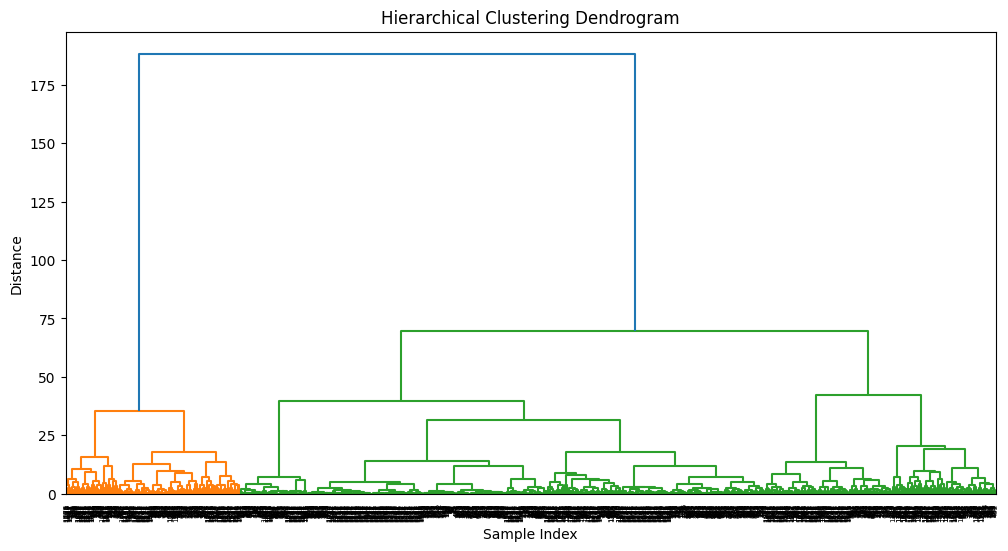

In [9]:
import matplotlib.pyplot as plt

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

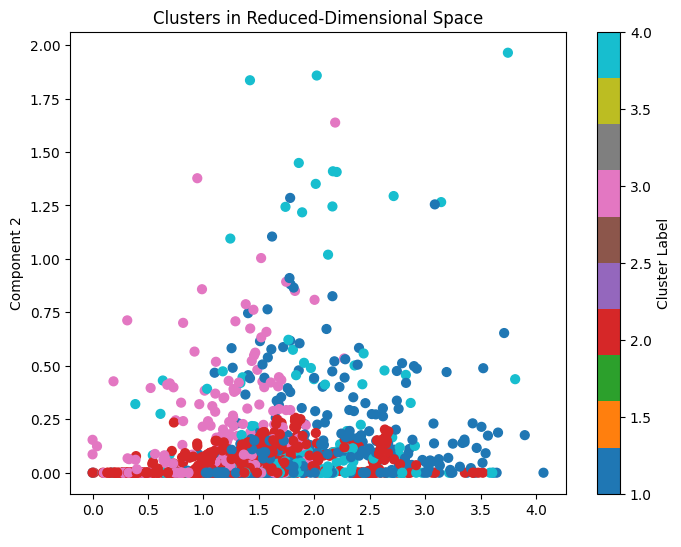

In [10]:
# Scatter plot of reduced data colored by cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='tab10', s=40)
plt.title('Clusters in Reduced-Dimensional Space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## Extract and Display Important Features

Extract and display the most important features based on encoder input weights.

In [11]:
import numpy as np
feature_names = data.columns.tolist()
# Get weights from input to first encoder layer
weights = encoder.layers[1].get_weights()[0]  # shape: (input_dim, 64)
importance = np.sum(np.abs(weights), axis=1)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Top important features from autoencoder:")
display(importance_df.head(10))

Top important features from autoencoder:


,Feature,Importance
1,LOC_BLANK,9.894539
20,NUM_UNIQUE_OPERATORS,9.804249
10,HALSTEAD_DIFFICULTY,9.787274
14,HALSTEAD_LEVEL,9.549349
2,BRANCH_COUNT,9.441702
6,DESIGN_COMPLEXITY,9.433531
21,LOC_TOTAL,9.428555
15,HALSTEAD_PROG_TIME,9.402580
19,NUM_UNIQUE_OPERANDS,9.224665
16,HALSTEAD_VOLUME,9.013189
